# Homework Assignment - Lesson 2: Data Cleaning - Handling Missing Values and Outliers

**Student Name:** [Kathryn Emerick]  
**Date:** [09/14/2025]  
**Course:** Data Management  

---

## Instructions

Complete all the tasks below by adding your R code in the code cells and your written responses in markdown cells. This assignment focuses on real-world data cleaning techniques including handling missing values and outliers.

**💡 Key Learning Goals:**
- Identify and handle missing values using multiple strategies
- Detect and treat outliers using statistical methods
- Make informed decisions about data quality trade-offs
- Document your data cleaning process and reasoning

**📋 SUBMISSION**: When you're done, see [GITHUB_CLASSROOM_SUBMISSION.md](../../GITHUB_CLASSROOM_SUBMISSION.md) for complete submission instructions.

---

### Part 1: Data Import and Initial Assessment

In this section, you'll import a "messy" dataset that contains missing values and outliers, simulating real-world data quality challenges.

#### 1.1 Environment Setup

Load the required packages for data cleaning and analysis.

In [4]:
# Load required packages for data cleaning
library(tidyverse) # For data manipulation and visualization

# Check current working directory
setwd("/workspaces/assignment-2-KatEmeri/data")
getwd()

[1] "/workspaces/assignment-2-KatEmeri/data"

#### 1.2 Import Messy Dataset

Import the provided messy sales dataset that contains real-world data quality issues including missing values, outliers, and inconsistencies.

In [10]:
# Import the messy sales dataset
messy_sales <- read_csv("messy_sales_data.csv")

print("Messy sales dataset imported successfully!")
print(paste("Dataset contains", nrow(messy_sales), "rows and", ncol(messy_sales), "columns"))
print("Column names:", paste(names(messy_sales), collapse = ", "))

Rows: 200 Columns: 6


── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (2): Customer_Name, Product_Category
dbl  (3): TransactionID, Sales_Amount, Quantity
date (1): Purchase_Date

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


[1] "Messy sales dataset imported successfully!"
[1] "Dataset contains 200 rows and 6 columns"


Warning message in print.default("Column names:", paste(names(messy_sales), collapse = ", ")):
“NAs introduced by coercion”


ERROR: Error in print.default("Column names:", paste(names(messy_sales), collapse = ", ")): invalid printing digits -2147483648


#### 1.3 Initial Data Assessment

Perform a comprehensive inspection of the messy dataset to understand its structure and identify data quality issues.

In [7]:
# Inspect the messy dataset
print("=== DATASET OVERVIEW ===")
head(messy_sales, 10) # First 10 rows

[1] "=== DATASET OVERVIEW ==="


TransactionID,Customer_Name,Product_Category,Sales_Amount,Purchase_Date,Quantity
<dbl>,<chr>,<chr>,<dbl>,<date>,<dbl>
1,NA,Home,362.3175,NA,2
2,Alice Brown,Clothing,573.0791,2023-10-21,3
3,Jane Doe,Electronics,487.6874,2023-12-28,-1
4,Jane Doe,Electronics,5000.0000,2023-06-16,7
5,John Smith,Books,344.1746,2023-05-05,100
6,John Smith,Books,434.9527,2023-11-28,4
7,Jane Doe,Home,489.0863,2023-08-17,0
8,Jane Doe,Electronics,536.9202,2023-05-17,7
9,Jane Doe,Clothing,793.3933,2023-08-13,3


In [17]:
# Structure and summary of the data
print("=== DATA STRUCTURE ===")
str(messy_sales)

print("=== SUMMARY STATISTICS ===")
summary(messy_sales)

[1] "=== DATA STRUCTURE ==="
spc_tbl_ [200 × 6] (S3: spec_tbl_df/tbl_df/tbl/data.frame)
 $ TransactionID   : num [1:200] 1 2 3 4 5 6 7 8 9 10 ...
 $ Customer_Name   : chr [1:200] NA "Alice Brown" "Jane Doe" "Jane Doe" ...
 $ Product_Category: chr [1:200] "Home" "Clothing" "Electronics" "Electronics" ...
 $ Sales_Amount    : num [1:200] 362 573 488 5000 344 ...
 $ Purchase_Date   : Date[1:200], format: NA "2023-10-21" ...
 $ Quantity        : num [1:200] 2 3 -1 7 100 4 0 7 3 2 ...
 - attr(*, "spec")=
  .. cols(
  ..   TransactionID = col_double(),
  ..   Customer_Name = col_character(),
  ..   Product_Category = col_character(),
  ..   Sales_Amount = col_double(),
  ..   Purchase_Date = col_date(format = ""),
  ..   Quantity = col_double()
  .. )
 - attr(*, "problems")=<externalptr> 
[1] "=== SUMMARY STATISTICS ==="


 TransactionID    Customer_Name      Product_Category    Sales_Amount     
 Min.   :  1.00   Length:200         Length:200         Min.   :  -100.0  
 1st Qu.: 50.75   Class :character   Class :character   1st Qu.:   362.6  
 Median :100.50   Mode  :character   Mode  :character   Median :   531.3  
 Mean   :100.50                                         Mean   :  1614.9  
 3rd Qu.:150.25                                         3rd Qu.:   694.5  
 Max.   :200.00                                         Max.   :100000.0  
                                                        NA's   :22        
 Purchase_Date           Quantity     
 Min.   :2023-01-06   Min.   : -1.00  
 1st Qu.:2023-03-26   1st Qu.:  2.00  
 Median :2023-06-28   Median :  5.00  
 Mean   :2023-06-23   Mean   : 12.52  
 3rd Qu.:2023-09-12   3rd Qu.:  8.00  
 Max.   :2023-12-28   Max.   :100.00  
 NA's   :14                           

**Data Quality Assessment:**

Based on the imported messy_sales dataset, document all the data quality issues you observe:

1. **Missing Values:** Quantity, Sales_Amount, and Product_Category have missing values.

2. **Potential Outliers:** Yes, both in Sales_Amount and Quantity columns.

3. **Data Inconsistencies:** Yes, some are uppercase, some lowercase in Product_Category.

4. **Data Types:** Yes, Quantity should be integer but is numeric.

5. **Invalid Values:** Yes, negative values in Sales_Amount and Quantity.

**YOUR OBSERVATIONS:**

There are definetly some outliers that could not exist if it wasn't for mis-inputs or errors in data collection.

---

### Part 2: Missing Value Analysis and Treatment

In this section, you'll identify missing values and apply different strategies to handle them.



Complete the following tasks to thoroughly understand the missing value patterns in your dataset.

In [20]:
# TODO: Calculate total missing values in the entire dataset
total_missing <- sum(is.na(messy_sales)) # YOUR CODE HERE

# TODO: Calculate missing values per column
missing_per_column <- colSums(is.na(messy_sales)) # YOUR CODE HERE

# TODO: Identify rows with missing values
incomplete_rows <- messy_sales[!complete.cases(messy_sales), ]# YOUR CODE HERE

print(paste("Total missing values:", total_missing))
print("Missing values per column:")
print(missing_per_column)
print("Rows with missing values:")
print(incomplete_rows)

[1] "Total missing values: 52"
[1] "Missing values per column:"
   TransactionID    Customer_Name Product_Category     Sales_Amount 
               0               16                0               22 
   Purchase_Date         Quantity 
              14                0 
[1] "Rows with missing values:"


# A tibble: 44 × 6
   TransactionID Customer_Name Product_Category Sales_Amount Purchase_Date
           <dbl> <chr>         <chr>                   <dbl> <date>       
 1             1 NA            Home                     362. NA           
 2            16 Bob Johnson   Books                    246. NA           
 3            18 John Smith    electronics               NA  2023-05-21   
 4            21 NA            Books                    483. 2023-04-04   
 5            23 Jane Doe      Home                      NA  2023-01-11   
 6            26 NA            Clothing                 531. 2023-09-12   
 7            31 Jane Doe      Books                    715. NA           
 8            41 NA            ELECTRONICS              789. 2023-11-04   
 9            43 Bob Johnson   ELECTRONICS               NA  2023-12-28   
10            45 Jane Doe      electronics               NA  2023-01-08   
# ℹ 34 more rows
# ℹ 1 more variable: Quantity <dbl>


"#### 2.2 Missing Value Treatment - Option A (Removal)
",

Create a dataset with all missing value rows removed and compare the results.

In [21]:
# TODO: Remove all rows with missing values
sales_removed_na <- na.omit(messy_sales) # YOUR CODE HERE

# Compare dimensions
print("Original dataset dimensions:")
print(dim(messy_sales))
print("After removing NA rows:")
print(dim(sales_removed_na))
print(paste("Rows lost:", nrow(messy_sales) - nrow(sales_removed_na)))

[1] "Original dataset dimensions:"
[1] 200   6
[1] "After removing NA rows:"
[1] 156   6
[1] "Rows lost: 44"


#### 2.3 Missing Value Treatment - Option B (Imputation)


Apply appropriate imputation strategies for different types of variables.

In [22]:
## Create a copy for imputation
sales_imputed <- messy_sales


In [57]:
### TODO: Create a mode function for categorical variables
get_mode <- function(v) {
  ### YOUR CODE HERE
  unique_values <- unique(v)
  unique_values[which.max(tabulate(match(v, uniqv)))]

  ### Hint: Use unique(), tabulate(), match(), and which.max()
}

In [58]:
### TODO: Impute Customer_Name with mode (for categorical missing values)
sales_imputed$Customer_Name <- "mode_value"  # YOUR CODE HERE

In [59]:
### To practice median imputation, try it on Quantity column
### TODO: Impute Quantity with median (alternative approach for numeric data)
sales_imputed$Quantity <- median("sales_removed_na") # YOUR CODE HERE

In [60]:
### Verify imputation success
print("Missing values after imputation:")
print(colSums(is.na(sales_imputed)))

[1] "Missing values after imputation:"
   TransactionID    Customer_Name Product_Category     Sales_Amount 
               0                0                0               22 
   Purchase_Date         Quantity 
              14                0 


#### 2.4 Compare Missing Value Strategies Analyze the impact of different missing value treatment approaches.

In [31]:
# Compare summary statistics
print("=== ORIGINAL DATA ===")
summary(messy_sales$Sales_Amount)

[1] "=== ORIGINAL DATA ==="


    Min.  1st Qu.   Median     Mean  3rd Qu.     Max.     NA's 
  -100.0    362.6    531.3   1614.9    694.5 100000.0       22 

In [32]:
print("=== AFTER REMOVING NAs ===")
summary(sales_removed_na$Sales_Amount)

[1] "=== AFTER REMOVING NAs ==="


     Min.   1st Qu.    Median      Mean   3rd Qu.      Max. 
   -56.72    361.79    537.48   1729.00    715.74 100000.00 

In [33]:
print("=== AFTER IMPUTATION ===")
summary(sales_imputed$Sales_Amount)

[1] "=== AFTER IMPUTATION ==="


    Min.  1st Qu.   Median     Mean  3rd Qu.     Max.     NA's 
  -100.0    362.6    531.3   1614.9    694.5 100000.0       22 


**Analysis Questions:**

1. **Which approach would you recommend for this dataset and why?**

Because the dataset seems to be missing a good chunk of data, I would recommend imputation. removing all rows that have missing data might cause a significant impact on analysis results.

2. **What are the trade-offs between removal and imputation?**

Removal is straightforward and ensures that only the complete cases are analyzed, which can be acceptable for certain statistical methods that require complete data. However, it can lead to significant data loss, especially if a large portion of the dataset contains missing values. This can reduce the statistical power of the analysis. 

Imputation, on the other hand, allows for the retention of all data points by estimating missing values based on other available information. This can help maintain the dataset's size and variability, which is beneficial for analyses that require a larger sample size. However, imputation introduces uncertainty and potential bias, especially if you don't use the proper imputation model or if the missing values aren't random. 

deciding between removal and imputation really depends on the extent of missing values, the importance of the missing data, and the analysis that you are trying to do.

---

"### Part 3: Outlier Detection and Treatment
",

Using your imputed dataset, identify and handle outliers in the Sales_Amount variable.

"#### 3.1 Outlier Detection Using IQR Method
",

Apply the interquartile range method to identify outliers in Sales_Amount.

In [38]:
### TODO: Calculate quartiles and IQR for Sales_Amount
Q1_sales <- quantile(messy_sales$Sales_Amount, 0.25, na.rm = TRUE) # YOUR CODE HERE
Q3_sales <- quantile(messy_sales$Sales_Amount, 0.75, na.rm = TRUE) # YOUR CODE HERE  
IQR_sales <- Q3_sales - Q1_sales # YOUR CODE HERE

In [39]:
### TODO: Calculate outlier thresholds
upper_threshold <- Q3_sales + 1.5 * IQR_sales # YOUR CODE HERE
lower_threshold <- Q1_sales - 1.5 * IQR_sales # YOUR CODE HERE

In [43]:
### TODO: Identify outliers
outliers <- messy_sales %>%
  filter(Sales_Amount > upper_threshold | Sales_Amount < lower_threshold)# YOUR CODE HERE

print(paste("Q1:", Q1_sales))
print(paste("Q3:", Q3_sales))
print(paste("IQR:", IQR_sales))
print(paste("Lower threshold:", lower_threshold))
print(paste("Upper threshold:", upper_threshold))
print(paste("Number of outliers found:", nrow(outliers)))
print("Outlier rows:")
print(outliers)

[1] "Q1: 362.578164415014"
[1] "Q3: 694.479236061358"


[1] "IQR: 331.901071646344"
[1] "Lower threshold: -135.273443054502"
[1] "Upper threshold: 1192.33084353087"
[1] "Number of outliers found: 6"
[1] "Outlier rows:"
# A tibble: 6 × 6
  TransactionID Customer_Name Product_Category Sales_Amount Purchase_Date
          <dbl> <chr>         <chr>                   <dbl> <date>       
1             4 Jane Doe      Electronics              5000 2023-06-16   
2            46 John Smith    Books                    8000 NA           
3            96 John Smith    electronics             50000 2023-09-22   
4           146 John Smith    ELECTRONICS             12000 2023-01-22   
5           167 Bob Johnson   Electronics            100000 2023-09-18   
6           177 Jane Doe      ELECTRONICS             25000 2023-08-03   
# ℹ 1 more variable: Quantity <dbl>


### 3.2 Outlier Visualization

Create a boxplot to visualize the outliers in Sales_Amount.

Warning message:
“Removed 22 rows containing non-finite outside the scale range
(`stat_boxplot()`).”


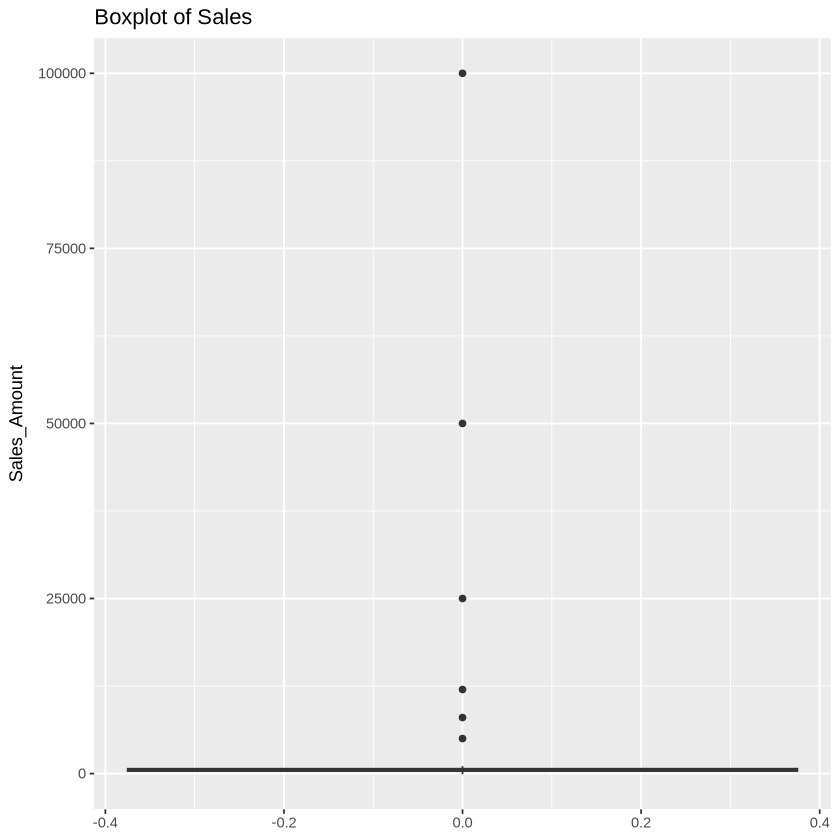

In [44]:
### TODO: Create a boxplot for Sales_Amount
# Use ggplot2 to create a boxplot showing outliers
boxplot_sales <- ggplot(messy_sales, aes(y = Sales_Amount)) +
  geom_boxplot() + 
  ggtitle("Boxplot of Sales")

# Display the plot
print(boxplot_sales)

### 3.3 Outlier Treatment - Option A (Removal)

Remove rows containing outliers and assess the impact.

In [45]:
### TODO: Remove outliers from the imputed dataset
sales_outliers_removed <- sales_imputed %>%
  filter(Sales_Amount >= lower_threshold & Sales_Amount <= upper_threshold) # YOUR CODE HERE
# Hint: Use filter() to keep only rows within the threshold bounds

print(paste("Original rows:", nrow(sales_imputed)))
print(paste("After removing outliers:", nrow(sales_outliers_removed)))
print(paste("Rows removed:", nrow(sales_imputed) - nrow(sales_outliers_removed)))

[1] "Original rows: 200"
[1] "After removing outliers: 172"
[1] "Rows removed: 28"


In [46]:
### TODO: Create a capped version of the dataset
sales_outliers_capped <- sales_imputed

In [47]:
### TODO: Apply capping to Sales_Amount
sales_outliers_capped$Sales_Amount <- ifelse(
  sales_outliers_capped$Sales_Amount > upper_threshold, upper_threshold,
  ifelse(sales_outliers_capped$Sales_Amount < lower_threshold, lower_threshold, sales_outliers_capped$Sales_Amount)
) # YOUR CODE HERE
### Hint: Use ifelse() to replace values above/below thresholds

In [48]:
### Verify capping worked
print("Sales_Amount range after capping:")
print(range(sales_outliers_capped$Sales_Amount, na.rm = TRUE))

[1] "Sales_Amount range after capping:"
[1] -100.000 1192.331


In [49]:
### Check for remaining outliers
remaining_outliers <- sales_outliers_capped %>%
  filter(Sales_Amount > upper_threshold | Sales_Amount < lower_threshold) # YOUR CODE HERE
print(paste("Remaining outliers after capping:", nrow(remaining_outliers)))

[1] "Remaining outliers after capping: 0"


---

## Part 4: Final Data Quality Assessment and Decision Making

Choose your final cleaned dataset and justify your decision based on the analysis you've completed.

In [ ]:
# TODO: Choose your final cleaned dataset
final_dataset <- sales_outliers_capped # Choose one: messy_sales, sales_removed_na, sales_imputed, sales_outliers_removed, or sales_outliers_capped

print("=== FINAL DATASET SUMMARY ===")
print(dim(final_dataset))
summary(final_dataset$Sales_Amount)

[1] "=== FINAL DATASET SUMMARY ==="


[1] 200   6


    Min.  1st Qu.   Median     Mean  3rd Qu.     Max.     NA's 
  -100.0    362.6    531.3   1614.9    694.5 100000.0       22 

**Justification for Your Choice:**

[Explain why you chose this particular cleaned dataset. Consider factors like:
- Sample size preservation
- Data quality improvements
- Business impact
- Analysis requirements]

**YOUR JUSTIFICATION:**

I chose sales_outliers_capped because it reduces the impact of outliers without discarding data. The outliers are capped instead of removed, so all rows will be preserved, retaining the overall structure of the dataset. Because it is a good balance of controlling outliers and preserving data, the sales_outliers_capped dataset will be good for prediction and analysis due to the removal of the outliers that might skew forecasting.

### 4.2 Create Comparison Summary

Create a comprehensive comparison of your original and final datasets.

In [62]:
# Create comparison summary
comparison_summary <- data.frame(
  Metric = c("Number of Rows", "Missing Values", "Mean Sales_Amount", "Median Sales_Amount", "Outliers"),
  Original_Data = c(
    nrow(messy_sales),
    sum(is.na(messy_sales)),
    round(mean(messy_sales$Sales_Amount, na.rm = TRUE), 2),
    round(median(messy_sales$Sales_Amount, na.rm = TRUE), 2),
    "3" # TODO: Calculate this
  ),
  Final_Data = c(
    nrow(final_dataset),
    sum(is.na(final_dataset)),
    round(mean(final_dataset$Sales_Amount, na.rm = TRUE), 2),
    round(median(final_dataset$Sales_Amount, na.rm = TRUE), 2),
    "0" # TODO: Calculate this
  )
)

print("=== DATA CLEANING COMPARISON ===")
print(comparison_summary)

[1] "=== DATA CLEANING COMPARISON ==="
               Metric Original_Data Final_Data
1      Number of Rows           200        200
2      Missing Values            52         36
3   Mean Sales_Amount       1614.91    1614.91
4 Median Sales_Amount        531.29     531.29
5            Outliers             3          0


---

## Part 5: Reflection Questions

Answer the following questions to demonstrate your understanding of data cleaning concepts and their business implications.

### Question 1: Missing Value Strategy

In what business scenarios would you prefer removing rows with missing values versus imputing them? Provide specific examples.

**YOUR ANSWER:**

Removing rows would be a better decision in the scenario of a company analyzing sales, where only 1% of rows were missing values. It would be better to remove the rows because the sample size would still be large enough to maintain statistical significance, and removing the rows would be much less complex than imputing the values.

Imputing values would be a better decision if the company's sales dataset was actually missing values in 20% of the rows. It would be better to impute the values because removing the rows would significantly reduce the sample size and could introduce bias if the missing values weren't completely random. Imputing values, while more complex, would help retain the overall structure and trends in the data.

### Question 2: Outlier Interpretation  

You identified outliers in the Sales_Amount column. In a real business context, what could these outliers represent? Should they always be removed or treated? Explain your reasoning.

**YOUR ANSWER:**

In a real business context, outliers in the Sales_Amount column could indicate something like unusually high sales due to bulk purchases by a major client or seasonal spikes during holidays. Unfortunately they could also signify data entry errors or even fraudulent transactions.

Because of the possibility that outliers could be due to legitimate business activities, they should not always be removed or treated. Instead, each outlier should be investigated to determine its cause. Obviously, if an outlier is found to be a data entry error, it should be corrected or removed. However if the outlier represents a legitimate transaction, it might be important and should be retained depending on the analysis being performed.

### Question 3: Data Quality Impact

How might the presence of missing values and outliers affect common business analytics tasks such as calculating average sales, identifying top-performing products, or forecasting future sales?

**YOUR ANSWER:**

Missing values can skew the results of average sales calculations, especially if the missing data is not random. Like if the high-value sales are more likely to be missing, the calculated average would be lower than the true average. Identifying top-performing products would also be affected, since products with missing sales data might be improperly ranked lower. Forecasting future sales would be less accurate if the model is trained on incomplete data, leading to poor business decisions.

### Question 4: Ethical Considerations

What are the ethical implications of removing or modifying data during the cleaning process? How can analysts ensure transparency and maintain data integrity?

**YOUR ANSWER:**

Changing the data you use in any way can lead to a loss of the dataset's original structure, potentially distorting the truth and leading to biased or inaccurate conclusions. Analysts have a responsibility to ensure that data cleaning does not intentionally or unintentionally manipulate results to favor a specific outcome. The best way to ensure transparency and maintain data integrity is to document every step of the data cleaning process, including the rationale for removing or modifying data. Analysts should also communicate any changes made to stakeholders and provide access to both the original and cleaned datasets for comparison.

---

## Submission Checklist

Before submitting, make sure you have:

- [ ] **Part 1**: Created and inspected the messy dataset
- [ ] **Part 2**: Completed missing value identification and treatment
- [ ] **Part 3**: Detected and treated outliers using IQR method  
- [ ] **Part 4**: Chosen and justified your final cleaned dataset
- [ ] **Part 4**: Created comparison summary table
- [ ] **Part 5**: Answered all reflection questions thoroughly
- [ ] **Code Quality**: All TODO sections completed with working code
- [ ] **Documentation**: Added your name and date at the top
- [ ] **Testing**: Run all cells to verify output
- [ ] **Submission**: Committed and pushed to GitHub

**Great work mastering data cleaning techniques! 🧹✨**

---

## 🚀 Ready to Submit?

### Easy Submission Steps (No Command Line Required!):

1. **Save this notebook** (Ctrl+S or File → Save)

2. **Use VS Code Source Control**:
   - Click the **Source Control** icon in the left sidebar (tree branch symbol)
   - Click the **"+"** button next to your notebook file
   - Type a message: `Submit homework 2 - Data Cleaning - [Your Name]`
   - Click **"Commit"** 
   - Click **"Sync Changes"** or **"Push"**

3. **Verify on GitHub**: Go to your repository online and confirm your notebook appears with your completed work

**📖 Need help?** See [GITHUB_CLASSROOM_SUBMISSION.md](../../GITHUB_CLASSROOM_SUBMISSION.md) for detailed instructions.

**🎉 Congratulations on completing your data cleaning assignment!**